In [8]:
from osgeo import gdal
from osgeo import ogr
from skimage import exposure
from skimage.segmentation import quickshift, slic
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [ ]:
image_path = r"C:\Users\Admin\Desktop\mini_projects\geoai\rgb_image.tif"
 
composite_image = gdal.Open(image_path)

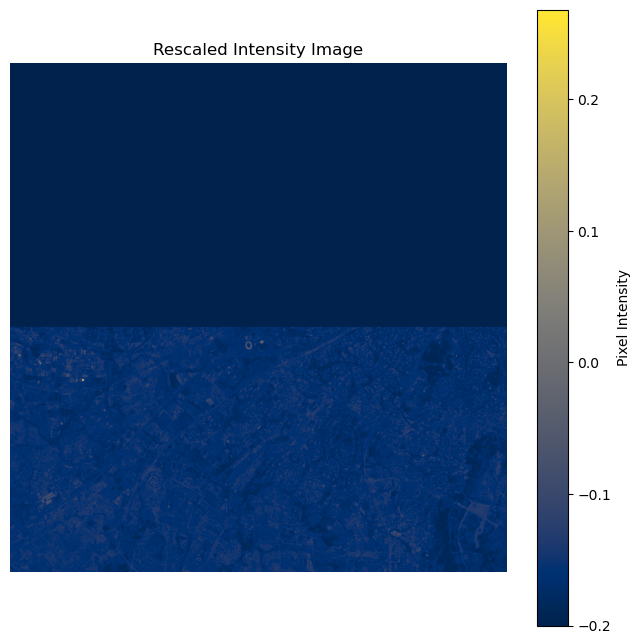

In [16]:
# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(composite_image.GetRasterBand(1).ReadAsArray(), cmap='cividis')  
plt.colorbar(label='Pixel Intensity')  
plt.title("Rescaled Intensity Image")
plt.axis('off') 
plt.show()

In [21]:
nbands = composite_image.RasterCount
band_data = []

for i in range(1, nbands+1):
    band = composite_image.GetRasterBand(i).ReadAsArray()
    band_data.append(band)

band_data = np.dstack(band_data)
img = exposure.rescale_intensity(band_data)

### Image Segmentation

Segmentation effectively reduces the number of elements in an image that need to be classified. This may reduce an image with 1 million pixels down to 50,000 segments, which is much more manageable.

A number of segmentation algorithms are available. We won’t go into details in detail in this article. I will show you results from two different algorithms, and how to implement them in Python with skimage


Segmentation method
* SLIC (Simple linear iterative clustering)
* Quickshift algorithms (lines 23 and 24, respectively)

In [24]:
# quickshift segementation
segments_qs = quickshift(img, ratio=0.99, max_dist=5, convert2lab=False)

# slic segment
seg_slic = slic(img, n_segments=500000, compactness=0.1)

In [27]:
driverTiff = gdal.GetDriverByName('GTiff')
# save the sqs segment image
segment_slic_filename = "slic_segment.tif"

segment_slic = driverTiff.Create(segment_slic_filename, composite_image.RasterXSize,
                                 composite_image.RasterYSize,1,
                                 gdal.GDT_Float32)

segment_slic.SetGeoTransform(composite_image.GetGeoTransform)
segment_slic.SetProjection(composite_image.SetProjection)
segment_slic.GetRasterBand(1).WriteArray(seg_slic)
segment_slic=None

TypeError: not a sequence

### Spectra Properties of Image Segment

In [ ]:
import scipy

def sement_features(segment_pixels):

    features = []

    npixels, nbands = segment_pixels.shape
    for b in range(nbands):
        stats = scipy.stats.describe(segment_pixels[:,b])
        band_stats = list(stats.minmax) + list(stats)[2:]
        if npixels ==1:
            band_stats[3] = 0.0
        features+= band_stats

    return features

https://towardsdatascience.com/land-cover-classification-in-satellite-imagery-using-python-ae39dbf2929
https://www.geeksforgeeks.org/decision-tree/
https://towardsdatascience.com/random-forest-explained-a-visual-guide-with-code-examples-9f736a6e1b3c
https://towardsdatascience.com/support-vector-machine-explained-8bfef2f17e71